In [187]:
import pandas as pd

from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns

%matplotlib inline

import warnings 
warnings.filterwarnings ('ignore')

In [188]:
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [189]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [190]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [191]:
df.shape

(645675, 5)

In [192]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [193]:
df = df.dropna(how ='any',axis=0)

In [194]:
df.shape

(620027, 5)

In [195]:
df.rename(columns={'dt': 'Date', 'AverageTemperature':'Avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [196]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [197]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [198]:
df['Year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [199]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [209]:
latest_df = df.loc['2000': '2015']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
2000-01-01,25.934,0.379,Acre,Brazil,2000
2000-02-01,26.102,0.288,Acre,Brazil,2000
2000-03-01,26.107,0.269,Acre,Brazil,2000
2000-04-01,25.952,0.427,Acre,Brazil,2000
2000-05-01,25.832,0.345,Acre,Brazil,2000


In [210]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.232150
Russia,2.902014
United States,11.830230
China,12.445344
Australia,18.582039
India,23.068622
Brazil,24.709489


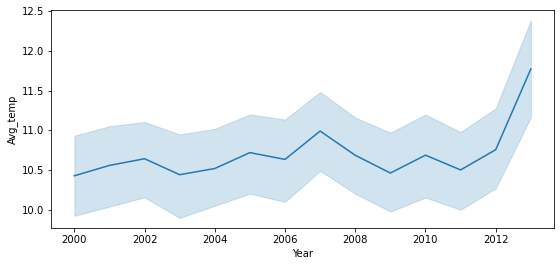

In [211]:
plt.figure(figsize=(9, 4))
sns.lineplot(x = "Year", y = "Avg_temp", data=latest_df)
plt.show()

In [212]:
resample_df = latest_df[["Avg_temp"]].resample('A').mean()

In [213]:
resample_df.head()

,Avg_temp
Date,
2000-12-31,10.426971
2001-12-31,10.557589
2002-12-31,10.641713
2003-12-31,10.440567
2004-12-31,10.518699


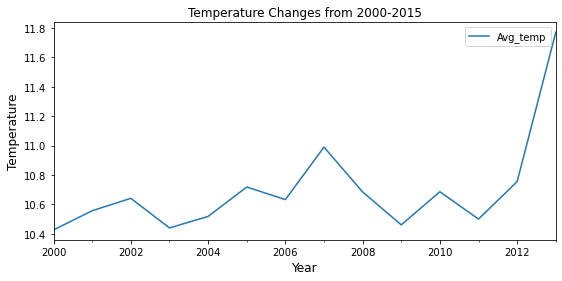

In [214]:
resample_df.plot(title='Temperature Changes from 2000-2015',figsize=(9,4))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [215]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results:')

test_df = adfuller(resample_df.iloc[:,0].values,autolag='AIC')

df_output = pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])

for key,value in test_df[4].items():
    df_output['Critical value (%s)'%key] = value
print (df_output)

Dickey Fuller Test Results:
Test Statistic                -1.951722
p-value                        0.308134
Lags Used                      5.000000
Number of Observations Used    8.000000
Critical value (1%)           -4.665186
Critical value (5%)           -3.367187
Critical value (10%)          -2.802961
dtype: float64


In [216]:
decomp = seasonal_decompose (resample_df, freq=3)

trend = decomp.trend
seasonal = decomp.seasonal
residual=decomp.resid

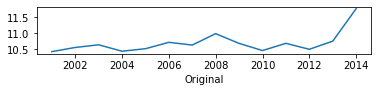

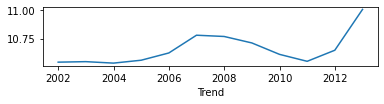

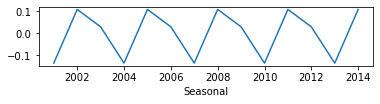

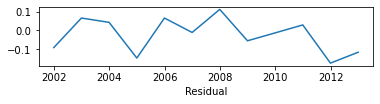

<Figure size 432x360 with 0 Axes>

In [217]:
plt.subplot (411) 
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot (412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

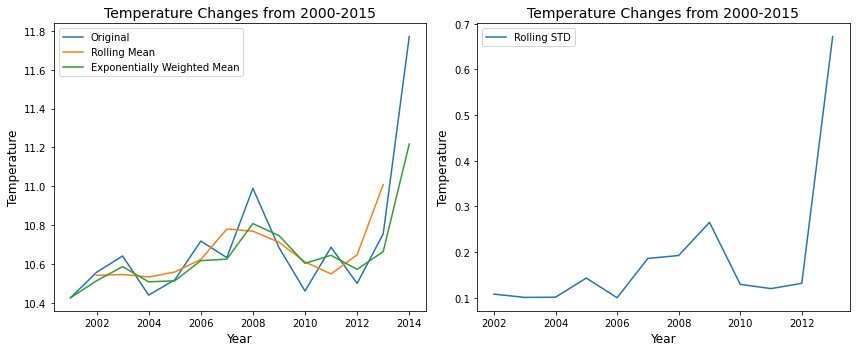

In [218]:
rol_mean = resample_df.rolling(window=3,center=True).mean()

ewm = resample_df.ewm(span=3).mean()

rol_std = resample_df.rolling(window=3,center=True).std()

fig,(ax2, ax3) = plt.subplots(1, 2, figsize=(12,5))

ax2.plot(resample_df,label='Original')
ax2.plot(rol_mean,label='Rolling Mean')
ax2.plot(ewm,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 2000-2015', fontsize=14)
ax2.set_ylabel('Temperature', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.legend()

ax3.plot(rol_std, label='Rolling STD')
ax3.set_title('Temperature Changes from 2000-2015', fontsize=14)
ax3.set_ylabel('Temperature', fontsize=12)
ax3.set_xlabel('Year', fontsize=12)
ax3.legend()

plt.tight_layout() 
plt.show()

In [219]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True) 
print ('Dickey-Fuller Test for the Rolling Mean:')
df_test = adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test [4].items(): 
    df_output['Critical Value(%s)'%key] = value
print(df_output)
print ('')
print('Dickey-Fuller Test for the Exponentially Weighted Mean:') 
df_test = adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output = pd.Series(df_test [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s) '%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 -1.588274
p-value                         0.489481
#Lags Used                      1.000000
Number of Observations Used    10.000000
Critical Value(1%)             -4.331573
Critical Value(5%)             -3.232950
Critical Value(10%)            -2.748700
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                -2.950336
p-value                        0.039800
#Lags Used                     5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [220]:
diff_rol_mean = resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
2001-12-31,0.015498
2002-12-31,0.095090
2003-12-31,-0.093093
2004-12-31,-0.040571
2005-12-31,0.095029


In [221]:
diff_ewm = resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
2000-12-31,0.000000
2001-12-31,0.043539
2002-12-31,0.054713
2003-12-31,-0.068336
2004-12-31,0.004740


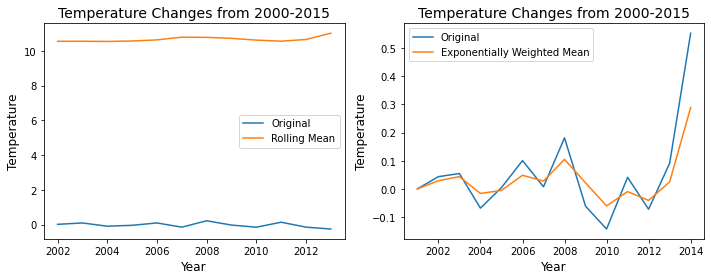

In [222]:
dif_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean()

fig,(ax2, ax3) = plt.subplots(1, 2, figsize=(10,4))

ax2.plot(diff_rol_mean,label='Original')
ax2.plot(rol_mean,label='Rolling Mean')
ax2.set_title('Temperature Changes from 2000-2015', fontsize=14)
ax2.set_ylabel('Temperature', fontsize=12)
ax2.set_xlabel('Year', fontsize=12)
ax2.legend()

ax3.plot(diff_ewm, label='Original')
ax3.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax3.set_title('Temperature Changes from 2000-2015', fontsize=14)
ax3.set_ylabel('Temperature', fontsize=12)
ax3.set_xlabel('Year', fontsize=12)
ax3.legend()

plt.tight_layout() 

In [223]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')

dfoutput=pd.Series (dftest [0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']) 
for key, value in dftest [4].items():
    dfoutput['Critical Value (%s)' %key] = value              
print(dfoutput)
print('')
print('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:') 
dftest = adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
dfoutput = pd.Series (dftest [0:4], index=['Test Statistic' , 'p-value', '#Lags Used', 'Number of Observations Used']) 
for key, value in dftest [4].items():
    dfoutput['Critical value (%s)' %key] = value
print(dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                -2.136254
p-value                        0.230189
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                -5.034517
p-value                        0.000019
#Lags Used                     4.000000
Number of Observations Used    9.000000
Critical value (1%)           -4.473135
Critical value (5%)           -3.289881
Critical value (10%)          -2.772382
dtype: float64


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 12 must be < 7.

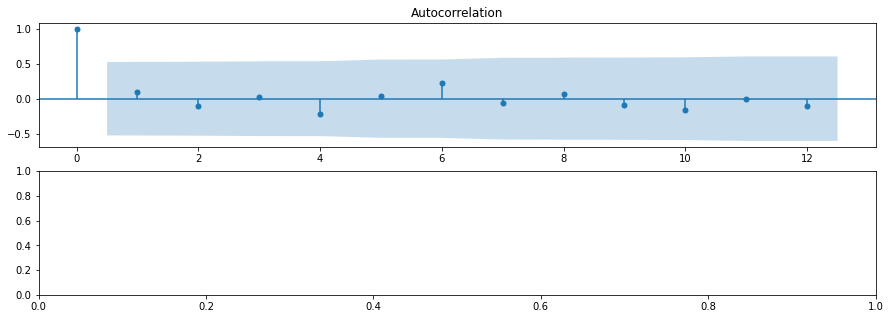

In [235]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(15,5))
pyplot.subplot(211) 
plot_acf(resample_df, ax=pyplot.gca()) 
pyplot.subplot(212)
plot_pacf(resample_df, ax=pyplot.gca())
pyplot.show()